In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


# Data Gathering 

In [2]:
df= pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA and Preprocessing 

In [3]:
df.shape
# here 13 independent feature and 1 dependent feature 

(303, 14)

In [4]:
df.info()
# we find that every independent and dependent feature are numeric value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()
#we can conclued that no null value present in this dataset 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
#here we see that there is some duplicate value present to our dataset so we have to drop it 

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [10]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


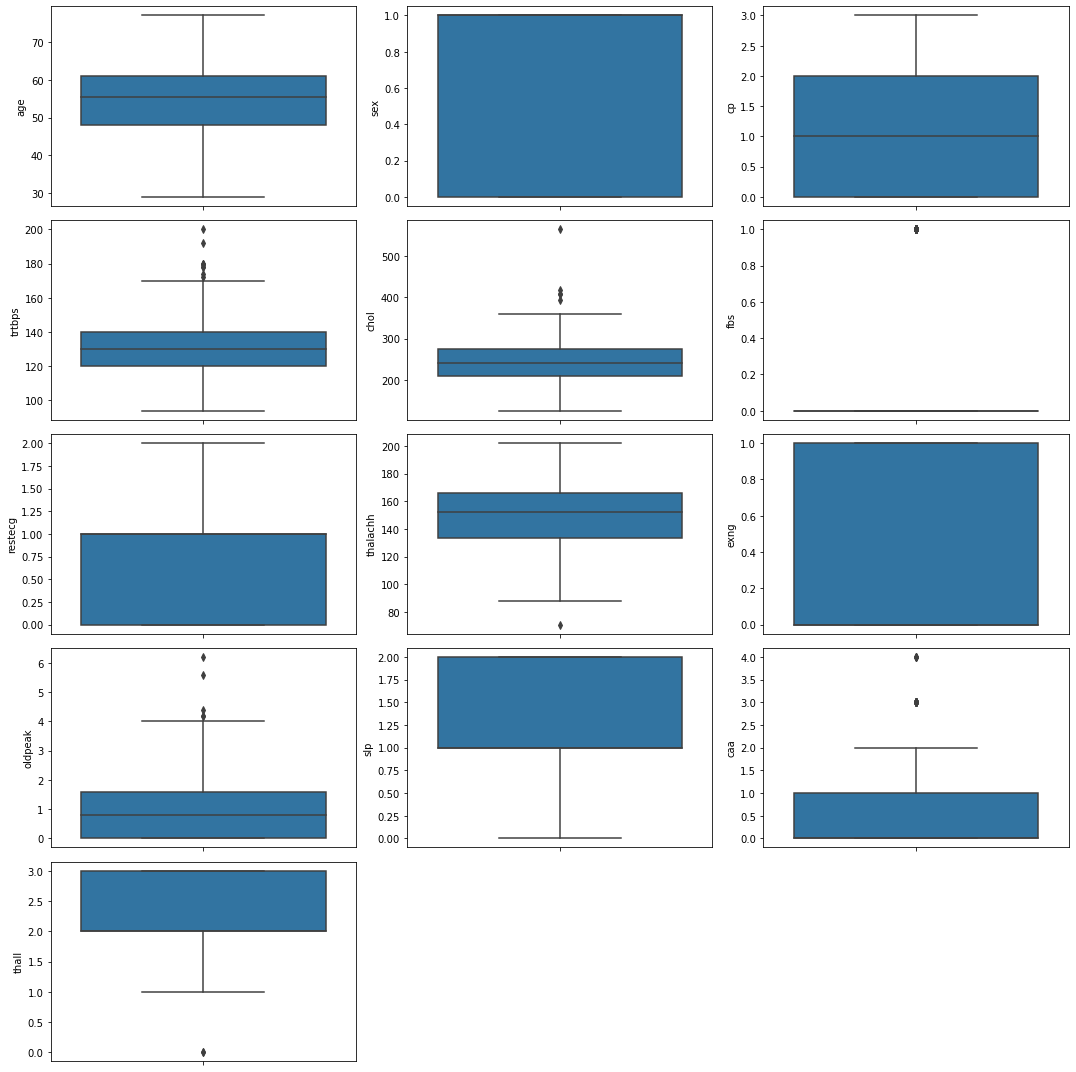

In [11]:
numerical_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
plt.tight_layout()

In [12]:
#conclusion outlier are present in trtbps,chol,oldpeak,caa 

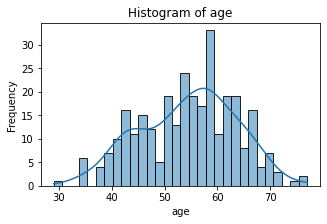

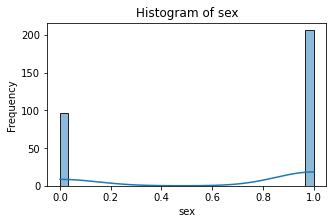

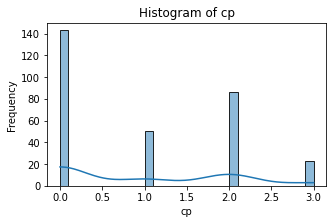

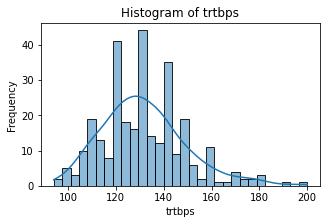

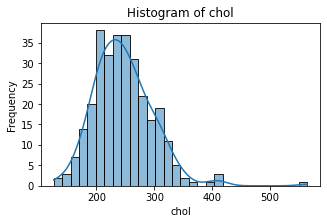

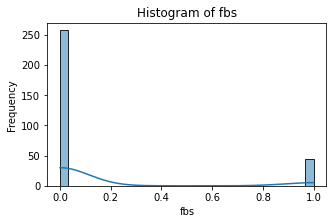

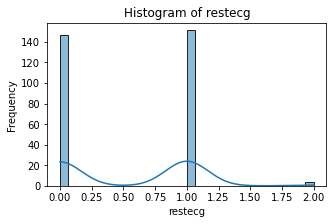

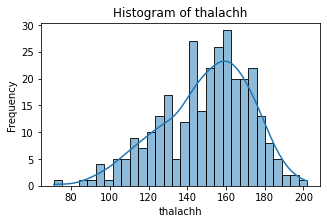

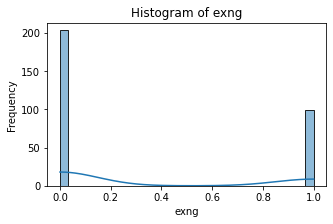

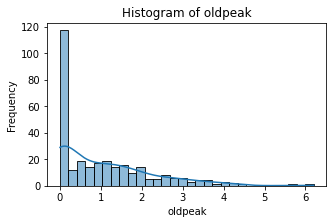

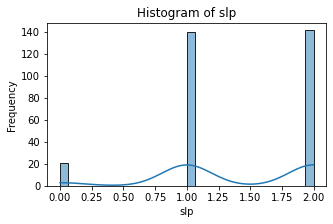

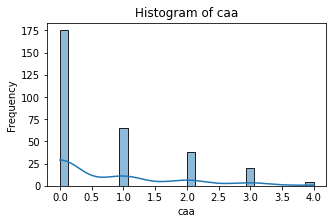

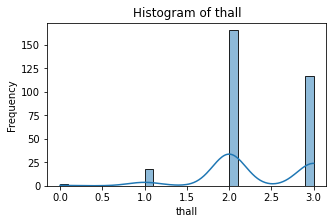

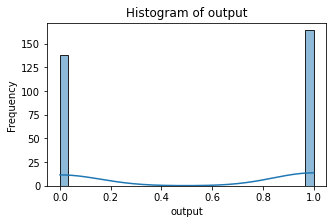

In [13]:

for i, column in enumerate(df.columns):
    plt.figure(figsize=(5,3))
    sns.histplot(x=df[column],data=df, bins=30, edgecolor='black',kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [14]:
#find corelation and plot it

In [15]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

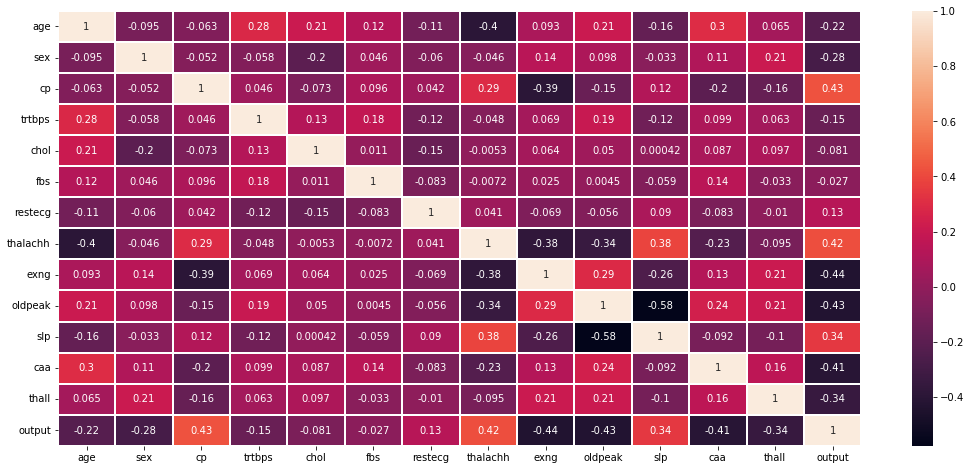

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),annot=True,linewidth=1.5)

In [17]:
#corelation with the output feature 

In [18]:
corr = df.corr()
target_corr = corr['output'].drop('output')
target_corr

age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
Name: output, dtype: float64

In [19]:
# 'cp','thalachh','slp' having 'positive' correlation with the 'output' variable.
# 'restecg' has 'Weak Positive' correlation.
#'age','sex','trtbps','exng','oldpeak','caa','thall' are having 'negative' correlation with 'output' variable.
#'chol' and 'fbs' has 'No Correlation' with output variable.

Text(0.5, 1.0, 'No Heart Attack vs Heart Attack')

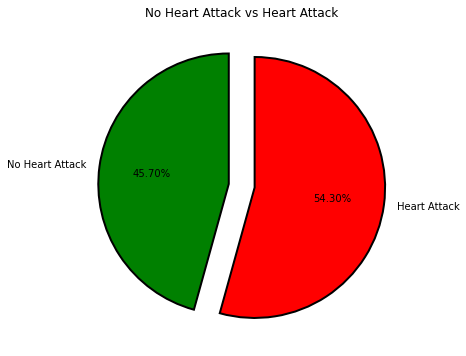

In [20]:
# almost balanced dataset

Diabetes_count = df['output'].value_counts()[1]
No_Diabetes_count = df['output'].value_counts()[0]
total_count = len(df)
diabetes_percentage = (Diabetes_count / total_count) * 100
no_diabetes_percentage = (No_Diabetes_count / total_count) * 100

value=[No_Diabetes_count,Diabetes_count]

plt.figure(figsize=(6,6))
plt.pie(value, labels=['No Heart Attack', 'Heart Attack'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors='g''r',  
        wedgeprops={'edgecolor': 'black', 'linewidth':2,})
plt.title('No Heart Attack vs Heart Attack')



<Figure size 10800x21600 with 0 Axes>

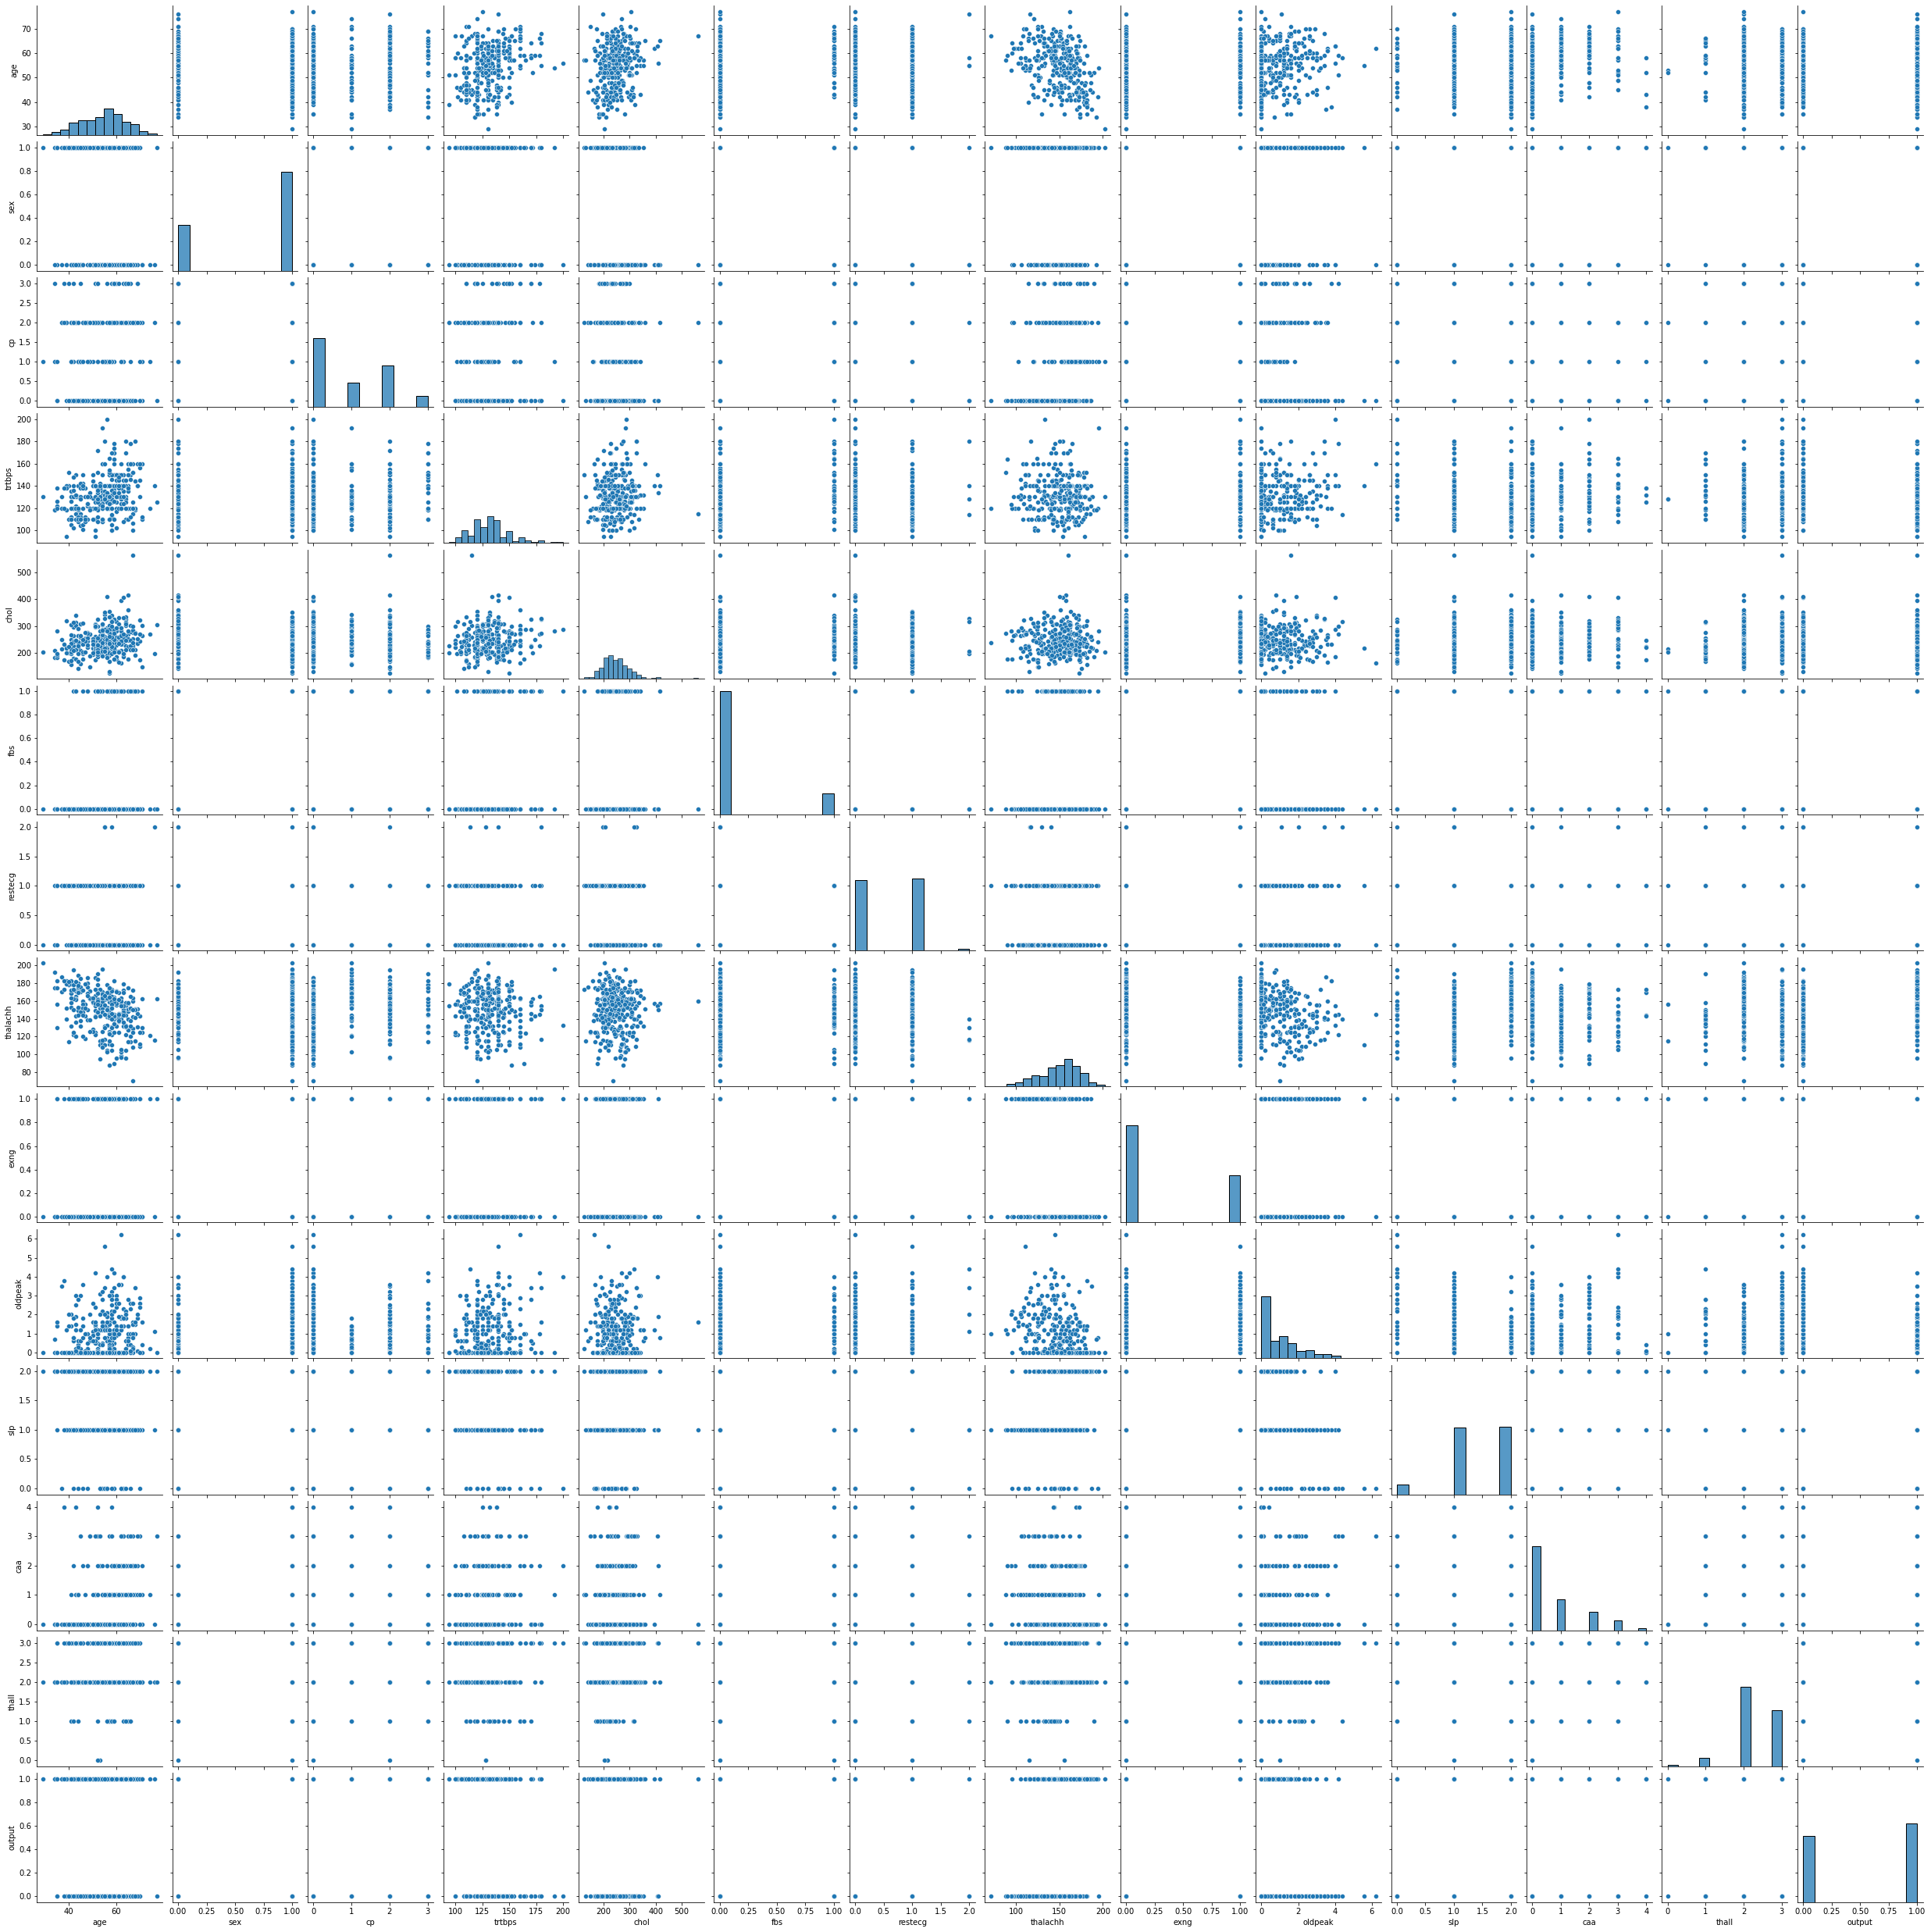

In [21]:
plt.figure(figsize=(150,300))
sns.pairplot(data=df)

# Spliting Train and Test Data 

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [23]:
X=df.iloc[:,:-1]
y=df['output']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Selection [Select Top 5 Features]

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [26]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)


Score list: [1.18443257e+01 5.10772560e+00 4.40146985e+01 5.72452265e+00
 2.32736526e-02 2.32714064e-01 1.40277191e+00 1.15087594e+02
 2.39095699e+01 4.46900698e+01 6.31145151e+00 6.11552980e+01
 4.50252619e+00]
Feature list: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


In [27]:
x_train_selection = select_feature.transform(X_train)
x_test_selection = select_feature.transform(X_test)

# Scaling the independent  feature 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train_selection)
X_test_scaled=scaler.transform(x_test_selection)

# LogisticRegression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
logistic_y_pred=lr.predict(X_test_scaled)
accuracy_score_lr=accuracy_score(logistic_y_pred,y_test)
print("____predicted values are____ :\n\n{}".format(logistic_y_pred))
print("\n____accuracy_score is____: \n\n{}".format(accuracy_score_lr))
print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(logistic_y_pred,y_test)))
print("\n____clasification report is:____\n")
print( classification_report(logistic_y_pred,y_test))


____predicted values are____ :

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1]

____accuracy_score is____: 

0.81

confusion matrix is____: 

[[35 11]
 [ 8 46]]

____clasification report is:____

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.81      0.85      0.83        54

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



# DecisionTreeClassifier Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
dt_y_pred=dt.predict(X_test_scaled)
accuracy_score_dt=accuracy_score(dt_y_pred,y_test)

print("____predicted values are____ :\n\n{}".format(dt_y_pred))

print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(dt_y_pred,y_test)))
print("\naccuracy_score is____: \n\n{}".format(accuracy_score_dt))
print("\n____clasification report is:____\n")

print(classification_report(dt_y_pred,y_test))


____predicted values are____ :

[0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1]

confusion matrix is____: 

[[37 12]
 [ 6 45]]

accuracy_score is____: 

0.82

____clasification report is:____

              precision    recall  f1-score   support

           0       0.86      0.76      0.80        49
           1       0.79      0.88      0.83        51

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



# RandomForest Model

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_y_pred=rf.predict(X_test_scaled)
accuracy_score_rf=accuracy_score(rf_y_pred,y_test)
print("____predicted values are____ :\n\n{}".format(rf_y_pred))
print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(rf_y_pred,y_test)))
print("\naccuracy_score is____: \n\n{}".format(accuracy_score_rf))
print("\n____clasification report is:____\n")
print(classification_report(rf_y_pred,y_test))

____predicted values are____ :

[0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1]

confusion matrix is____: 

[[33 12]
 [10 45]]

accuracy_score is____: 

0.78

____clasification report is:____

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.79      0.82      0.80        55

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



# SVC  Model

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
svc = SVC(random_state=1)
svc.fit(X_train_scaled,y_train)
svc_y_pred=svm.predict(X_test_scaled)
accuracy_score_svc=accuracy_score(svm_y_pred,y_test)
print("____predicted values are____ :\n\n{}".format(svc_y_pred))
print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(svc_y_pred,y_test)))
print("\naccuracy_score is____: \n\n{}".format(accuracy_score_svc))
print("\n____clasification report is:____\n")
print(classification_report(svc_y_pred,y_test))





NameError: name 'svm' is not defined

In [ ]:
#print("LogisticRegression Predict class probabilities: {}".format(lr.predict_proba(X_test_scaled)))
#print("DecisionTreeClassifier Predict class probabilities: {}".format(lr.predict_proba(X_test_scaled)))
#print("RandomForestClassifier Predict class probabilities: {}".format(lr.predict_proba(X_test_scaled)))
#print("Support Vector Machine Predict class probabilities: {}".format(lr.predict_proba(X_test_scaled)))



# Hypertuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## After Hypertuning LogisticRegression 

In [ ]:
parameters_lr = {'penalty':('l1', 'l2', 'elasticnet'),
              'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
              'C':[1,10,20]}

clf_lr=GridSearchCV(lr,param_grid=parameters_lr,cv=5,n_jobs=-1) 
clf_lr.fit(X_train_scaled,y_train)
final_lr_parameter=clf_lr.best_params_
final_lr_score=clf_lr.best_score_


## After Hypertuning DecisionTreeClassifier  


In [ ]:
parameters_dt = {'criterion':['gini', 'entropy', 'log_loss'],
              'splitter':['best','random'],
              'max_depth':[1,2,3,4,5]}

clf_dt=GridSearchCV(dt,param_grid=parameters_dt,cv=5,n_jobs=-1)
clf_dt.fit(X_train_scaled,y_train)
final_dt_parameter=clf_dt.best_params_
final_dt_score=clf_dt.best_score_


## After Hypertuning RandomForestClassifier

In [ ]:
parameters_rf = {'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[1,2,3,4,5],
            'max_features':[0.1,0.2,0.5,0.7,1.0],
              'n_estimators':[20,60,120],
                'max_samples':[0.25,0.5,0.75,1.0]}

clf_rf=GridSearchCV(rf,param_grid=parameters_rf,cv=10,n_jobs=-1)
clf_rf.fit(X_train_scaled,y_train)
final_rf_parameter=clf_rf.best_params_
final_rf_score=clf_rf.best_score_


## After Hypertuning SVC

In [ ]:
parameters_svm = {'max_iter':[10,100,150,200,],
                  'C':[0.1,1,100]
                 }
svc.get_params().keys()
clf_svc=GridSearchCV(svc,param_grid=parameters_svm,cv=5,n_jobs=-1)
clf_svc.fit(X_train_scaled,y_train)
final_svc_parameter=clf_svc.best_params_
final_svc_score=clf_svc.best_score_


# FINAL OUTPUT

In [ ]:
final_model=pd.DataFrame({
                        'Model': ['Logistic Regression',
                                   'Decision Tree Classifier',
                                   'Random Forest Classifier',
                                   'Support Vector Machine'],
                         'Accuracy': [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_svm],
'Final_Model':['Logistic Regression',
                                   'Decision Tree Classifier',
                                   'Random Forest Classifier',
                                   'Support Vector Machine'],
                        'Final_Accuracy':[final_lr_score,final_dt_score,final_rf_score,final_svm_score]})


In [ ]:
final_model
